# NLP (Natural Language Processing) with Python
In this Repo we will work with :
* Combining machine learning techniques with text.
* Using math and statistics to get that text in a format that the machine learning algorithms can understand.

In [1]:
# ONLY RUN THIS CELL IF YOU NEED 
# TO DOWNLOAD NLTK AND HAVE CONDA

# Uncomment the code below and run:

# !conda install nltk #This installs nltk
# import nltk # Imports the library
# nltk.download() #Download the necessary datasets
import nltk as nlp
# nlp.download_shell()
# importing more library that require
import pandas as pd

## list comprehension - basically list comprehension is a process to create a list with the help of existing list
list_comprehenssion_mesg = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]
print(len(list_comprehenssion_mesg))
* The file we are using contains a collection of more than 5 thousand SMS phone messages. You can check out the **readme** file for more info.

Let's go ahead and use rstrip() plus a list comprehension to get a list of all the lines of text messages:

## Data Collection
We'll be using a dataset from the [UCI datasets](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection)! This dataset is already located in the folder for this section.

In [2]:
list_comprehenssion_mesg = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]
print(len(list_comprehenssion_mesg))
# collection of text called corpus
list_comprehenssion_mesg[0:2]

5574


['ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'ham\tOk lar... Joking wif u oni...']

In [3]:
# line rstrip() function - it is use to remove the word from given list
# for example -
str1 = "my name is nikhil \n and we are working on"
print(str1.rstrip())
# list_comprehension - It is use for create a new list from existing list
# list comprehension
fruits = ["apple", "banana", "cherry", "kiwi", "mango"]
newlist = [x for x in fruits if "a" in x]

print(newlist)

my name is nikhil 
 and we are working on
['apple', 'banana', 'mango']


In [4]:
for msg_no,msgs in enumerate(list_comprehenssion_mesg[:10]):
    print(msg_no,msgs)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [5]:
# example of enumerate
lst = ['Go', 'until', 'jurong', 'point']
obj1 = enumerate(lst)
print ("Return type:",type(obj1))
print (dict(enumerate(lst)))
print (list(enumerate(lst)))

Return type: <class 'enumerate'>
{0: 'Go', 1: 'until', 2: 'jurong', 3: 'point'}
[(0, 'Go'), (1, 'until'), (2, 'jurong'), (3, 'point')]


In [6]:
# here we are converting our message to excel csv file and then seprate our column on the basis of '\t' along with column names.

messages_to_excel = pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',
                        names=["label", "message"])
messages_to_excel.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Exploratry Data Analysis / Data Visualization

In [7]:
messages_to_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
messages_to_excel.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
# here we use groupby function for detect most comming message in hap and spam
messages_to_excel.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

## feature Engineering
Feature engineering has two goals primarily: Preparing the proper input dataset, compatible with the machine learning algorithm requirements. Improving the performance of machine learning models

In [10]:
messages_to_excel['length'] = messages_to_excel['message'].apply(len)

In [11]:
messages_to_excel.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [12]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

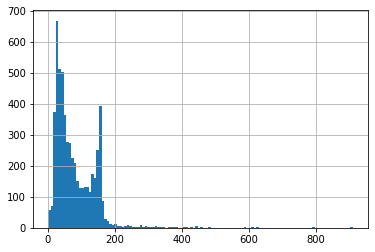

In [13]:
messages_to_excel['length'].hist(bins=120)

In [14]:
messages_to_excel['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [15]:
messages_to_excel[messages_to_excel['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

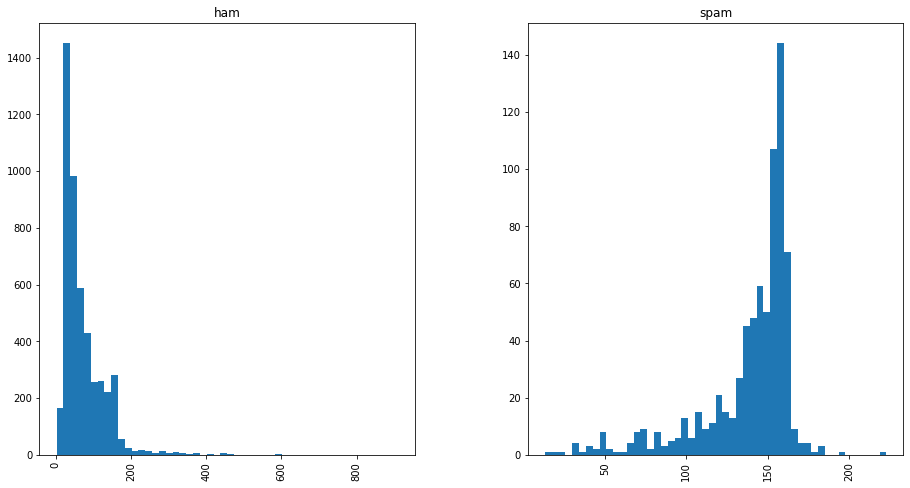

In [16]:
# ploting hist with lable
messages_to_excel.hist(column='length', by='label',bins=50,figsize=(15,8))

# Text pre Processing
## Tokenization
### Tokenization is process to convert normal text string to tokens and tokens are just a list of string in that format that we want. or we can say clean version of words.

# Now here we are going to understand how we can work with stopword and punctuation.
1. punctuation
* So basically puctuation are the char or symbols ['!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'] and we have to  remove this symbols or char from our data if data contain any symbol.

2. Stopwords
* Those word that are very comman and don't tell you any distungish features like [is ae",
 "you'll","you'd",'your','yours',etc.] and we are going to remove this words from our data.
 

In [17]:
# Start with Puctuation
import string

# Punctuation

In [18]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
# Now first take an example to understand how we can remove Puctuation
str_01 = "We are +- going to ! work with text @ Pre Processing"
# this string contain lot's of Punctuation and now we are going to remove it with help of lisy comprehension
remove_punc = [word for word in str_01 if word not in string.punctuation]
print(remove_punc) 
#'''uncomment when you want to run the code'''
# here punc is removed from list but we got the word in seprated way to join this word into a complete string withous punctuation.
remove_punc = ''.join(remove_punc)
# join function use for join soething or give any symbol or char b/w them.
print(remove_punc)

['W', 'e', ' ', 'a', 'r', 'e', ' ', ' ', 'g', 'o', 'i', 'n', 'g', ' ', 't', 'o', ' ', ' ', 'w', 'o', 'r', 'k', ' ', 'w', 'i', 't', 'h', ' ', 't', 'e', 'x', 't', ' ', ' ', 'P', 'r', 'e', ' ', 'P', 'r', 'o', 'c', 'e', 's', 's', 'i', 'n', 'g']
We are  going to  work with text  Pre Processing


# Stopwords

In [20]:
# to check total word in stopwords run this
from nltk.corpus import stopwords
total_stopwords = stopwords.words('english')
#total_stopwords '''uncomment when you want to run the code'''

In [21]:
# Lets take an example how we can remove the stopwords from the given string
print(remove_punc.split())
remove_stpwrds = [word for word in remove_punc.split() if word.lower() not in stopwords.words('english')]
print('\n')
print(remove_stpwrds)
# here we can see the diffrence after removing stopwords from data.

['We', 'are', 'going', 'to', 'work', 'with', 'text', 'Pre', 'Processing']


['going', 'work', 'text', 'Pre', 'Processing']


### Now We are going to Create a function for removing Punctuation and stop words for our data

In [22]:
 def text_preprocessing(strng):
    '''
    1. Remove Punctuation
    2. Remove stopword
    3. Return clean Data
    '''
    remove_punct = [word for word in strng if word not in string.punctuation]
    remove_punct = ''.join(remove_punct)
    remove_stpwrds_ = [word for word in remove_punct.split() if word.lower() not in stopwords.words                                            ('english')]
    return remove_stpwrds_


In [23]:
# So now function for Punctuation and for stopword is created and we are going to apply it on our message data
messages_to_excel['message'].apply(text_preprocessing)

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [2nd, time, tried, 2, contact, u, U, £750, Pou...
5568                   [ü, b, going, esplanade, fr, home]
5569                     [Pity, mood, Soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [Rofl, true, name]
Name: message, Length: 5572, dtype: object

# Vectorization
## bag-of-words

* Currently, we have the messages as lists of tokens this is also known as lemmas and now we need to convert each of those messages into a vector the SciKit Learn's algorithm models can work with.
* Now we'll convert each message, represented as a list of tokens (lemmas) above, into a vector that machine learning models can understand.

* We'll do that in three steps using the bag-of-words model:

1. Count how many times does a word occur in each message (Known as term frequency)

2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)

3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm)



In [24]:
# Now we are going to do 1st step that is term frequency
from sklearn.feature_extraction.text import CountVectorizer
''' here we create a matrics or we can say a sparse matrics via we can count the number of words occour in each message row. '''
bow_transformer =  CountVectorizer(analyzer=text_preprocessing).fit(messages_to_excel['message'])

In [25]:
# here this we can find or we can say 11425 words in our message section
print(len(bow_transformer.vocabulary_))

11425


In [26]:
message_4 = messages_to_excel['message'][3]
print(message_4)

U dun say so early hor... U c already then say...


In [27]:
bow_4 = bow_transformer.transform([message_4])

In [28]:
print(bow_4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [36]:
bow_transformer.get_feature_names()[4629]

'already'

In [37]:
message_bow_trans = bow_transformer.transform(messages_to_excel['message'])

In [39]:
#print(message_bow_trans)

In [32]:
print('shape of spare matrix :',message_bow_trans.shape)

shape of spare matrix : (5572, 11425)


In [33]:
message_bow_trans.nnz

50548

In [46]:
sparsity =  (100* message_bow_trans.nnz / (message_bow_trans.shape[0] * message_bow_trans.shape[1]))
("sparsity: {}".format((sparsity)))

'sparsity: 0.07940295412668218'

In [47]:
from sklearn.feature_extraction.text import TfidfTransformer

In [48]:
tfidf = TfidfTransformer().fit(message_bow_trans)